In [1]:
from specific_dataset import *
from specific_train import *
from specific_augmentation import *

import matplotlib.pyplot as plt

import torch, torchvision
import torchvision.transforms as transforms

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
batch_size = 32


train_transform = Compose([
    Resize(256), RandomCrop((224, 400)),
    RandomHorizontalFlip(), RandomRotation(10),
    ToTensor(), Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

val_transform = Compose([
    Resize(256), CenterCrop((224, 400)),
    ToTensor(), Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])


train_dataset = LDataset(data_type='train', transform=train_transform)
val_dataset = LDataset(data_type='val', transform=val_transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [4]:
model = Baseline(model='resnet18', num_classes=3, print_freq=5, save=True, tag='LRB')

In [5]:
epochs = 5
lr = 0.0005
weight_decay = 0.00001

In [6]:
model.train(train_loader, val_loader, epochs=epochs, lr=lr, weight_decay=weight_decay)

Epoch 1 Started...
Best Model Saved
Iteration : 1 - Train Loss : 1.299819, Test Loss : 1.009876, Train Acc : 34.375000, Test Acc : 52.581522
Best Model Saved
Iteration : 6 - Train Loss : 0.403578, Test Loss : 0.475614, Train Acc : 84.375000, Test Acc : 80.366848
Best Model Saved
Iteration : 11 - Train Loss : 0.034070, Test Loss : 0.174012, Train Acc : 100.000000, Test Acc : 92.934783
Best Model Saved
Iteration : 16 - Train Loss : 0.013572, Test Loss : 0.091037, Train Acc : 100.000000, Test Acc : 95.991848
Iteration : 21 - Train Loss : 0.159620, Test Loss : 0.122869, Train Acc : 93.750000, Test Acc : 94.157609
Best Model Saved
Iteration : 26 - Train Loss : 0.020445, Test Loss : 0.014979, Train Acc : 100.000000, Test Acc : 99.320652
Iteration : 31 - Train Loss : 0.009056, Test Loss : 0.042500, Train Acc : 100.000000, Test Acc : 98.913043
Iteration : 36 - Train Loss : 0.113144, Test Loss : 0.201940, Train Acc : 96.875000, Test Acc : 93.206522
Best Model Saved
Iteration : 41 - Train Loss :

Iteration : 86 - Train Loss : 0.004137, Test Loss : 0.007062, Train Acc : 100.000000, Test Acc : 99.592391
Iteration : 91 - Train Loss : 0.004252, Test Loss : 0.001192, Train Acc : 100.000000, Test Acc : 100.000000
Iteration : 96 - Train Loss : 0.000890, Test Loss : 0.001390, Train Acc : 100.000000, Test Acc : 100.000000
Iteration : 101 - Train Loss : 0.005098, Test Loss : 0.001382, Train Acc : 100.000000, Test Acc : 100.000000
Iteration : 106 - Train Loss : 0.000921, Test Loss : 0.001310, Train Acc : 100.000000, Test Acc : 100.000000
Iteration : 111 - Train Loss : 0.002344, Test Loss : 0.001586, Train Acc : 100.000000, Test Acc : 100.000000
Iteration : 116 - Train Loss : 0.001527, Test Loss : 0.001635, Train Acc : 100.000000, Test Acc : 100.000000
Iteration : 121 - Train Loss : 0.001536, Test Loss : 0.002565, Train Acc : 100.000000, Test Acc : 100.000000
Iteration : 126 - Train Loss : 0.000381, Test Loss : 0.002810, Train Acc : 100.000000, Test Acc : 100.000000
Iteration : 131 - Train

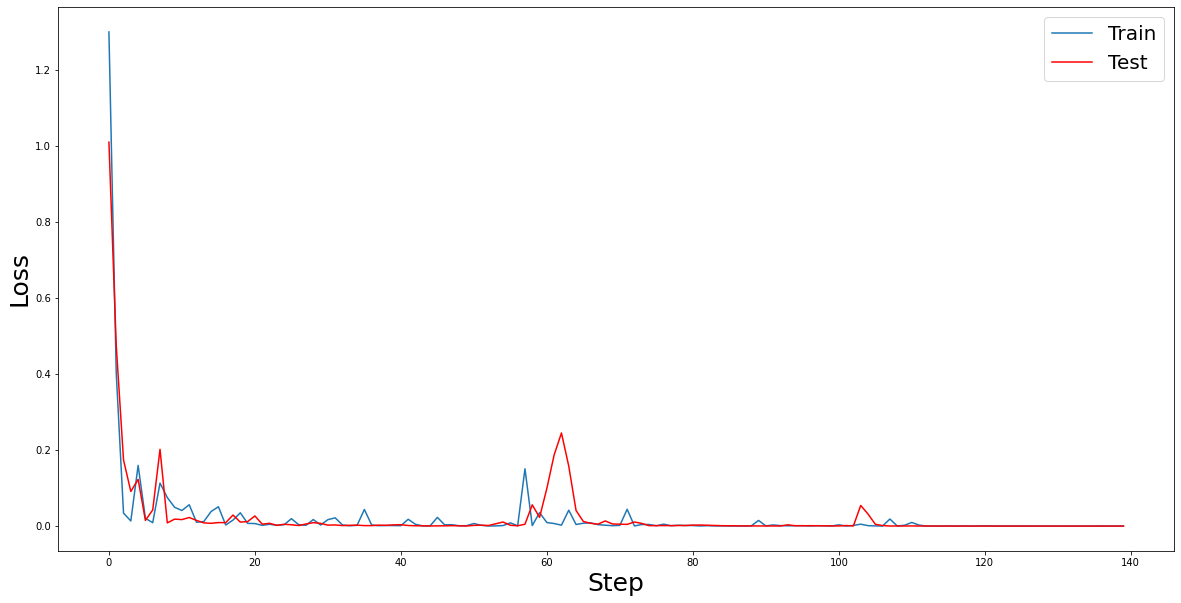

In [7]:
label_fontsize = 25

plt.figure(figsize=(20, 10))
train_lossline, = plt.plot(model.train_losses, label='Train')
test_lossline, = plt.plot(model.test_losses, color='red', label='Test')
plt.legend(handles=[train_lossline, test_lossline], fontsize=20)
plt.xlabel('Step', fontsize=label_fontsize)
plt.ylabel('Loss', fontsize=label_fontsize)
plt.show()

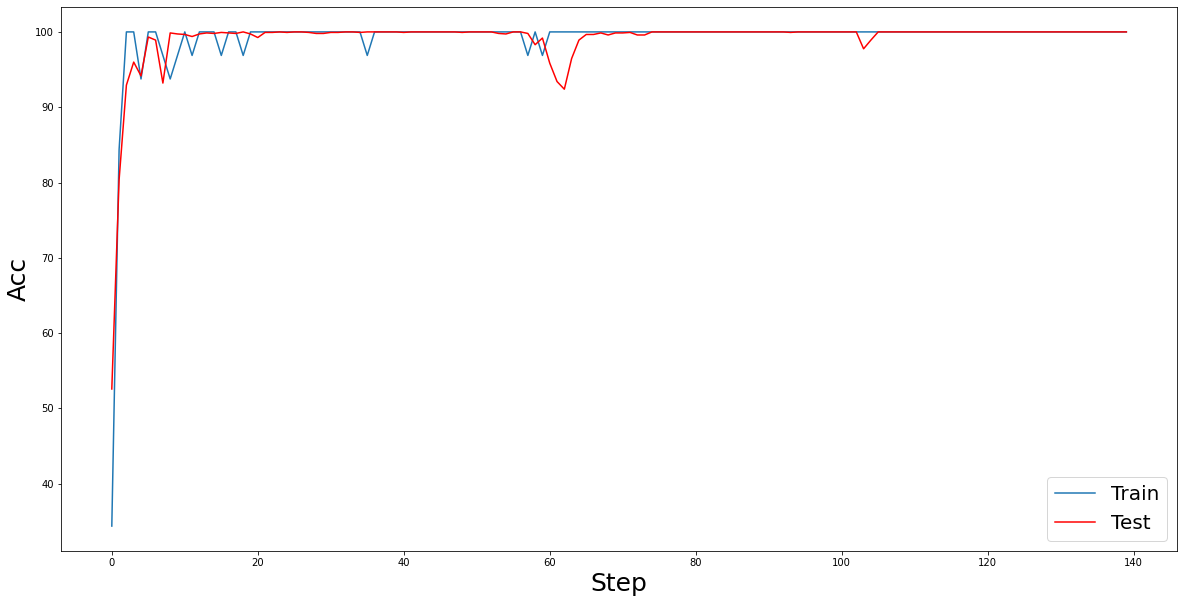

In [8]:
plt.figure(figsize=(20, 10))
train_accline, = plt.plot(model.train_acc, label='Train')
test_accline, = plt.plot(model.test_acc, color='red', label='Test')
plt.legend(handles=[train_accline, test_accline], fontsize=20)
plt.xlabel('Step', fontsize=label_fontsize)
plt.ylabel('Acc', fontsize=label_fontsize)
plt.show()